# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('D:/DATAS/Python/data/Модуль 11/yulu_bike_sharing_dataset.csv')

In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [4]:
df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   casual       10886 non-null  int64  
 9   registered   10886 non-null  int64  
 10  count        10886 non-null  int64  
 11  date         10886 non-null  object 
 12  day          10886 non-null  int32  
 13  week         10886 non-null  UInt32 
 14  weekday_num  10886 non-null  int32  
 15  weekday      10886 non-null  object 
 16  year         10886 non-null  int32  
 17  month        10886 non-null  int32  
 18  hour       

In [6]:
df[df['date'] == df['date'].iloc[0]]['hour'].nunique()

24

**Висновок:**
В цьому наборі даних 19 колонок, 10886 рядків, датасет займає 1.42 Мб оперативної памʼяті. 

Перевірка по кожній даті, яку я виконала  вище  показує погодинну деталізацію в даних, а також те, що кожна дата має повний набір годин (немає пропусків).

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


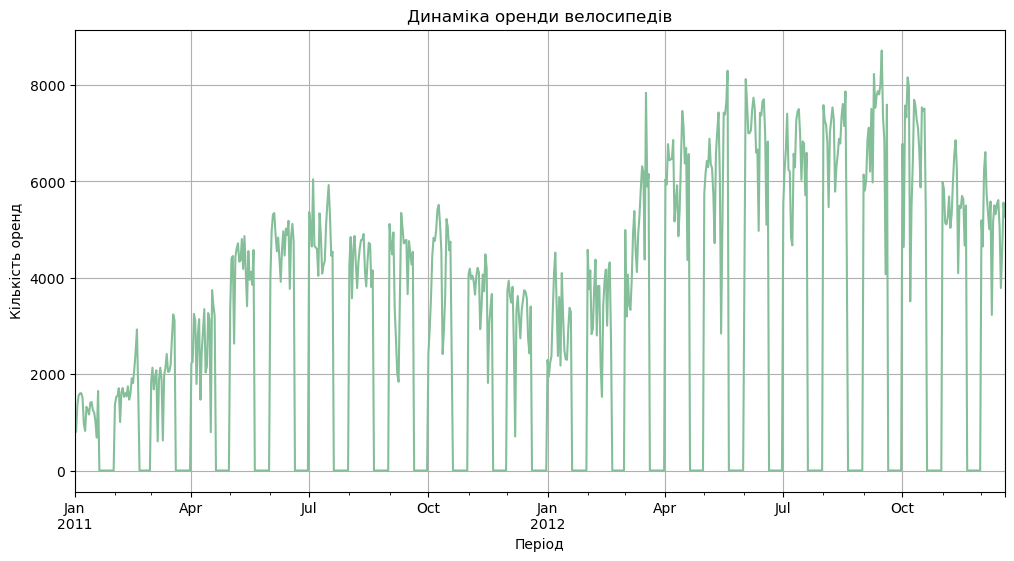

In [54]:
daily_counts = df['count'].resample('D').sum()
daily_counts.plot(
    color='#84BF99',
    figsize=(12, 6), 
    title='Динаміка оренди велосипедів',
    xlabel='Період',
    ylabel='Кількість оренд',
    grid=True
    )
plt.show()

In [8]:
days = df.groupby('day')['count'].sum()
days

day
1     103692
2     105381
3     111561
4     112335
5     109115
6     108600
7     105486
8     102770
9     108041
10    111645
11    111146
12    109257
13    111448
14    112406
15    115677
16    109837
17    118255
18    108437
19    110387
Name: count, dtype: int64

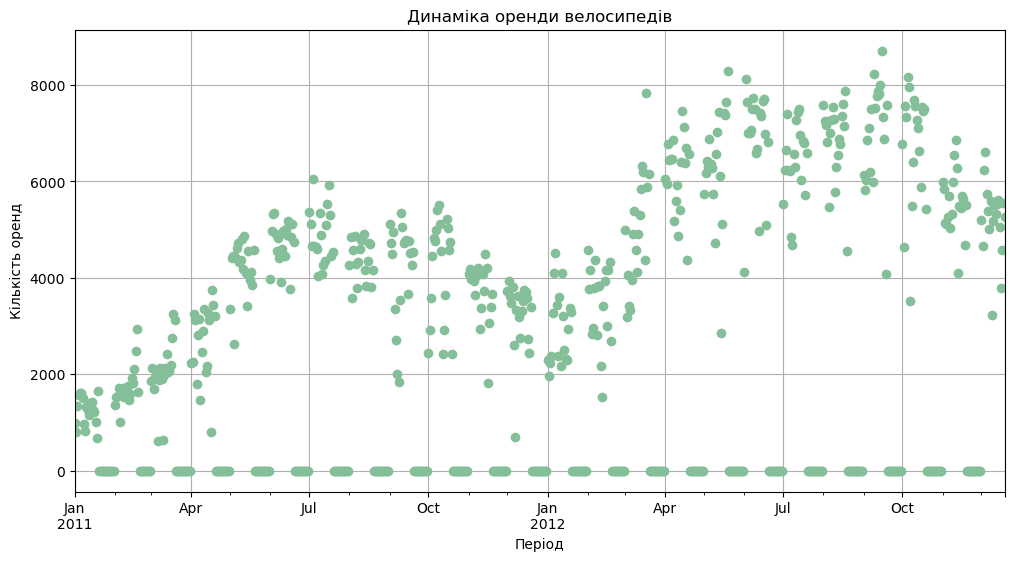

In [53]:
daily_counts.plot(
    color='#84BF99',
    style='o',
    figsize=(12, 6), 
    title='Динаміка оренди велосипедів',
    xlabel='Період',
    ylabel='Кількість оренд',
    grid=True
    )
plt.show()

**Висновки:**

1. Заломи на графіку тут виглядають як відсутність даних, тому що інформація є лише про 19 днів кожного місяця, а інші дні просто відсутні (стало відомо завдяки групування по дням). Щоб прибрати заломи та бачити тенденції, вище я побудувала графік, який наносить маркери даних без ліній, він вийшов більш плавної форми.

2. Основна тенденція - чітке зростання кількості оренд протягом усього періоду спостереження. В обох роках повторюється однаковий сезонний тренд, але у 2012 році рівень користування сервісом вищий - це ознака загального росту популярності Yulu.

3. Сезонні коливання помітні дуже чітко, що логічно, бо велосипедна активність залежить від погоди. Сезонність річна: тренд приймає низькі значення взимку, зростає навесні, приймає пікові значення влітку (липень-серпень), спадає протягом осені, знову падає до мінімумів взимку (січень).

4. Аномально низькі значення присутні, бо в датасеті є неповні дані - відсутні спостереження після 19 числа кожного місяця. Це схоже на проблему збору даних, тож необхідно перевірити процес збору та експорту даних, щоб виключити технічні аномалії, які до цього призвели. Реально низькі значення помітні в зимові місяці (січень, лютий, грудень) через холодну погоду та можливу негоду. Аномально високих значень немає, є піки кожного літа, вони виникають через гарну погоду, довший світовий день, час відпусток, бажання проводити більше часу на вулиці.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

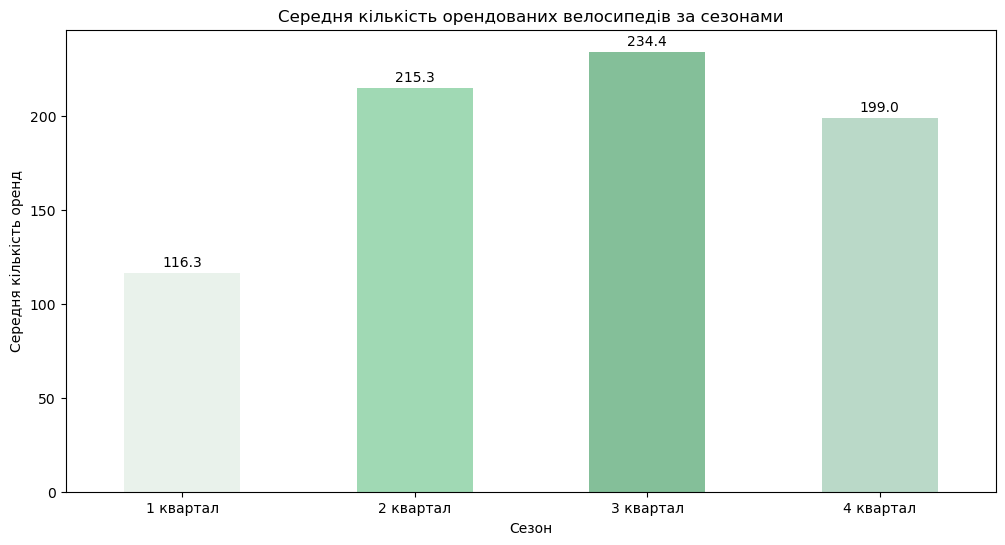

In [10]:
season_map = {1: '1 квартал', 2: '2 квартал', 3: '3 квартал', 4: '4 квартал'}
season_avg = df.groupby('season')['count'].mean().rename(index=season_map)
ax = season_avg.plot.bar(
    figsize=(12,6),
    color=['#E9F2EB','#A0D9B4','#84BF99','#BAD9C8'],
    title='Середня кількість орендованих велосипедів за сезонами',
    xlabel='Сезон',
    ylabel='Середня кількість оренд'
    )

plt.xticks(rotation=0)

for i, v in enumerate(season_avg):
    ax.text(i, v + 2, str(round(v,1)), ha='center', va='bottom')
plt.show()

**Висновки:**
1. Найбільш популярний сезон за середньою кількістю оренд - третій квартал року (*липень*, *серпень*, *вересень*) - значення **234,4**, бо погода для поїздок комфортна, а на початку осені не така спекотна, як влітку і після літніх відпусток та канікул люди повертаються до роботи та навчання і обирають велосипеди як альтернативу переповненому громадському транспорту чи автомобілям, які стоять в заторах.

2. Найнижчі середні показники в першому кварталі (*січень*, *лютий*, *березень*) - **116,3** можуть бути через нестабільну погоду на початку сезону (дощ, прохолода), а також через те, що користувачі лише починають звикати до використання велосипедів після зими. Але ще з попереднього дослідження видно, що найнижчі показники за увесь час спостереження припали на перший квартал 2011 року, вони дуже вплинули на загальну картину, бо далі в основному був тільки ріст кількості оренд. Високий показник оренди в другому кварталі (*квітень*, *травень*, *червень*) - **215,3** очікуваний, оскільки це пора переважно теплої та сухої погоди, початку відпусток та канікул. Четвертий квартал (*жовтень*, *листопад*, *грудень*) має трохи менші показники - **199**, бо погода псується тим більше, чим ближче до зими і є менш комфортною для подорожей велосипедом.

3. Середня кількість оренд між найпопулярнішим та найменш популярним сезоном по показникам на графіку відрізняється **вдвічі** (234,4/116,3 = 2,02).

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


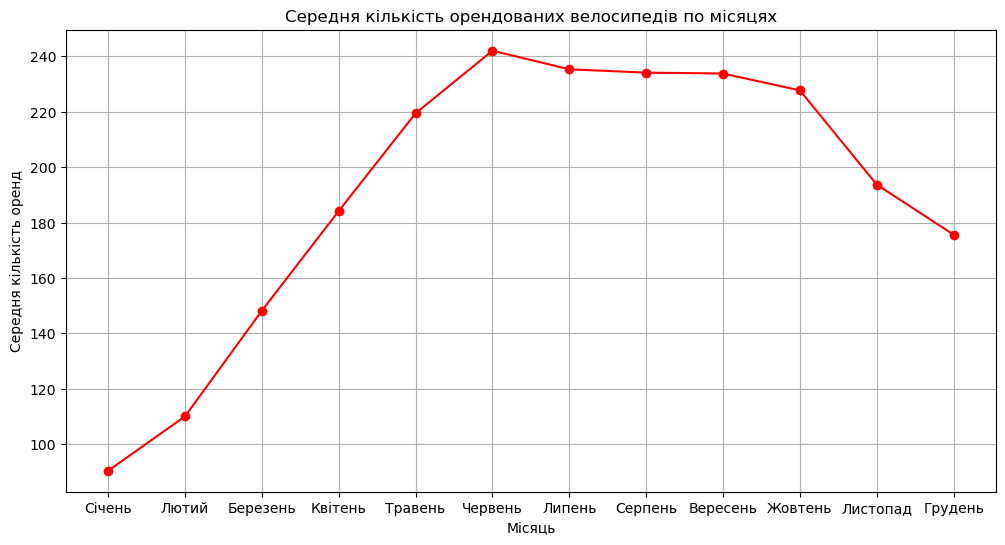

In [9]:
monthly_avg = df.groupby('month')['count'].mean()
monthly_avg.plot(
    kind='line',
    marker='o',
    figsize=(12, 6),
    color='red',
    title='Середня кількість орендованих велосипедів по місяцях',
    xlabel='Місяць',
    ylabel='Середня кількість оренд',
    grid=True 
)
plt.xticks(ticks=range(1,13),
           labels=['Січень','Лютий','Березень','Квітень','Травень','Червень',
                   'Липень','Серпень','Вересень','Жовтень','Листопад','Грудень'])
plt.show()

**Висновки:**
1. Пік є доволі широким, можна фіксувати його з середини травня до жовтня, найбільш піковий місяць на графіку - червень. Зріст спостерігається на графіку протягом зими-перших місяців весни і спад відбувається після жовтня.

2. В цілому цей графік повторює трактування результатів попереднього завдання - літні місяці і початок осені через свою комфортні погодні умови сприяють стабільно високому показнику кількості оренд.

3. Так, можна зробити висновок, що оренда велосипедів дійсно залежить від якості погодних умов: в теплі місяці без опадів з комфортною погодою кількість випадків оренди стабільно висока і вона знижується з настанням прохолодних сезонів.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

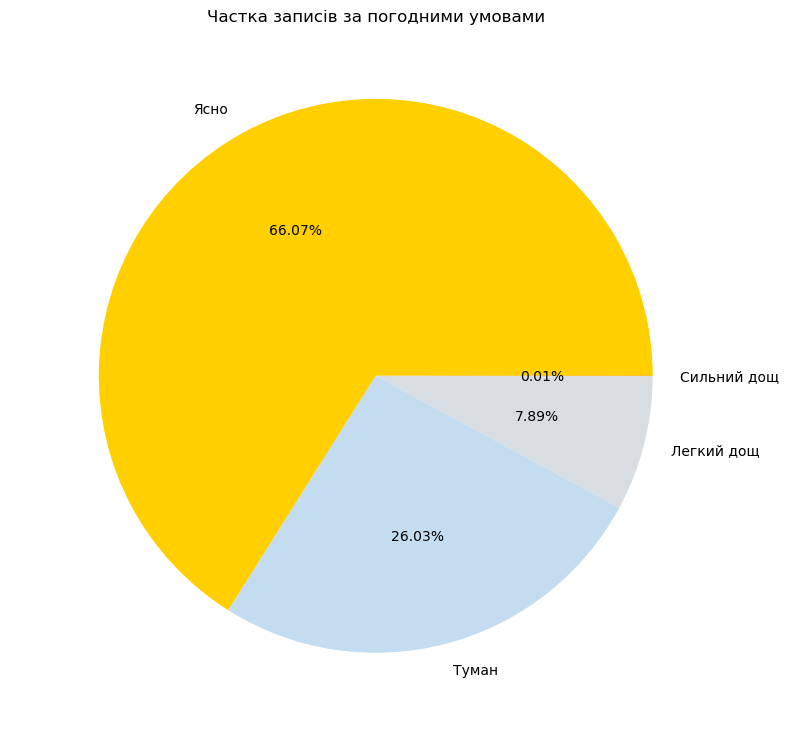

In [36]:
weather_map = {1: 'Ясно', 2: 'Туман', 3: 'Легкий дощ', 4: 'Сильний дощ'}
weather_counts = df['weather'].value_counts().rename(index=weather_map)
weather_counts.plot.pie(
    colors = ['#ffcf00', '#C3DCF0', '#D8DDE1', '#FF4500'],
    figsize=(8, 8),
    autopct='%1.2f%%',
    title='Частка записів за погодними умовами',
    ylabel=' '
    )
plt.tight_layout()

In [49]:
stormy_days = df[df['weather'] == 4]['date'].nunique()

total_days = df['date'].nunique()

stormy_percent = (stormy_days / total_days) * 100

print("Кількість днів із сильним дощем:", stormy_days)
print("Всього днів у датасеті:", total_days)
print("Відсоток днів із сильним дощем: {:.2f}%".format(stormy_percent))

Кількість днів із сильним дощем: 1
Всього днів у датасеті: 456
Відсоток днів із сильним дощем: 0.22%


**Висновки:**

1. Pie chart побудований по кількості всіх записів (рядків) в датасеті, тобто погодинно, а не по дням:

- *Ясно* - **66,07%** - максимальний попит, це ідеальні умови для поїздок: комфортно, безпечно та приємно, тому більшість оренди припадає саме на таку погоду.
 
- *Туман* - **26,03%** - зберігається помірний попит, така погода може суттєво знижувати видимість, тому кількість розважальних поїздок може падати, але попит на робочі поїздки залишається високим.
 
- *Легкий дощ* - **7,89%** - суттєве зниження попиту, як правило, в таку погоду пересуватись велосидедом обирають ті, хто має належне спорядження.
 
- *Сильний дощ* - **0,01%** (за рядками) або **0,22%** (за днями) - різке падіння попиту, бо він не тільки створює дискомфорт, але й робить поїздку небезпечною (слизька дорога, погана видимість).

2. Днів з сильним дощем - 1, це складає **0,22%** від усіх днів (але треба зважати, що в кожному місяці відсутні дані щонайменше за 10 останніх днів місяця).

3. Погодні умови є ключовим фактором коливань попиту на оренду велосипедів, тому спостерігається пряма залежність: чим краща погода, тим вищий попит. Основні причини зниження попиту - це дискомфорт (дощ, сильний вітер, туман) та небезпека (сильний дощ, погана видимість, слизька дорога).

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

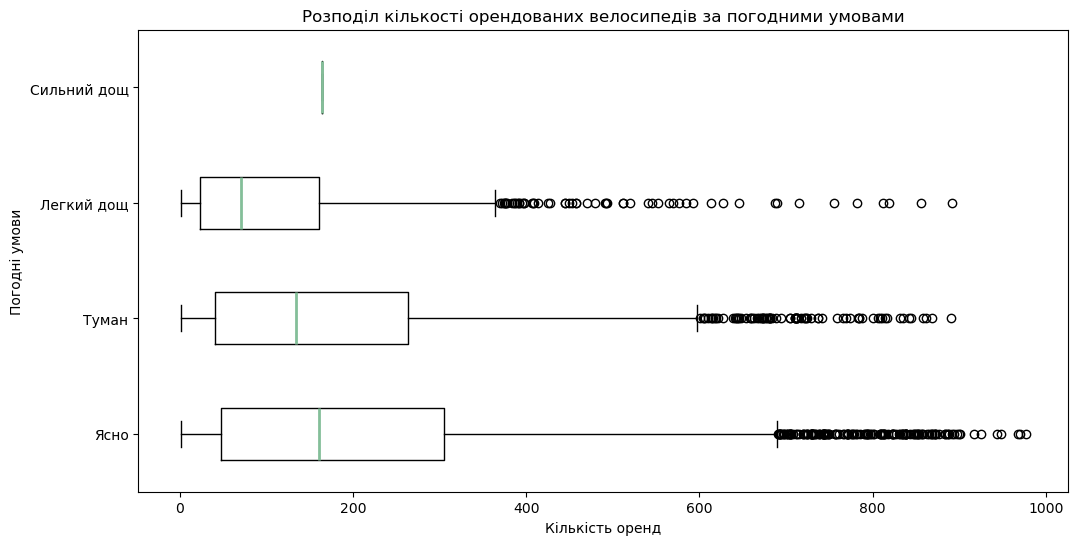

In [55]:
weather_map = {1: 'Ясно', 2: 'Туман', 3: 'Легкий дощ', 4: 'Сильний дощ'}
weather_named = df['weather'].map(weather_map)

box_data = [df.loc[weather_named == w, 'count'] for w in weather_map.values()]

plt.figure(figsize=(12,6))
plt.boxplot(
    box_data, 
    tick_labels=weather_map.values(), 
    vert=False,
    medianprops={'color': '#84BF99', 'linewidth': 2}
    )

plt.title('Розподіл кількості орендованих велосипедів за погодними умовами')
plt.xlabel('Кількість оренд')
plt.ylabel('Погодні умови')

plt.show()

**Висновки:**

1. Найбільший розкид у кількості оренди спостерігається при погоді *Ясно* - про це свідчить найдовший "вус" та найширший "ящик" порівняно з іншими погодними умовами. Це означає, що коли погода ясна, кількість оренд може дуже сильно відрізнятися: від дуже низької до максимальних значень. Це підтверджує, що за ясної погоди на попит також впливають інші фактори (день тижня, сезон, свята, температура).

2. В категоріях *Ясно*, *Туман* та *Легкий дощ* видно багато кружечків праворуч від "вусів", які позначають викиди - дні з аномально високою кількістю оренди.
В категорії *Сильний дощ* викиди відсутні. Дані представлені лише однією вертикальною лінією (дуже вузьким ящиком), бо згідно підрахунків в попередньому завданні - це один день.

3. Найвище медіанне значення оренди велосипедів спостерігається при ясній погоді. Зелена лінія розташована найдалі праворуч, тобто має найвищу кількість оренд серед усіх погодних умов, що логічно, бо така погода сприяє активному використанню велосипедів.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

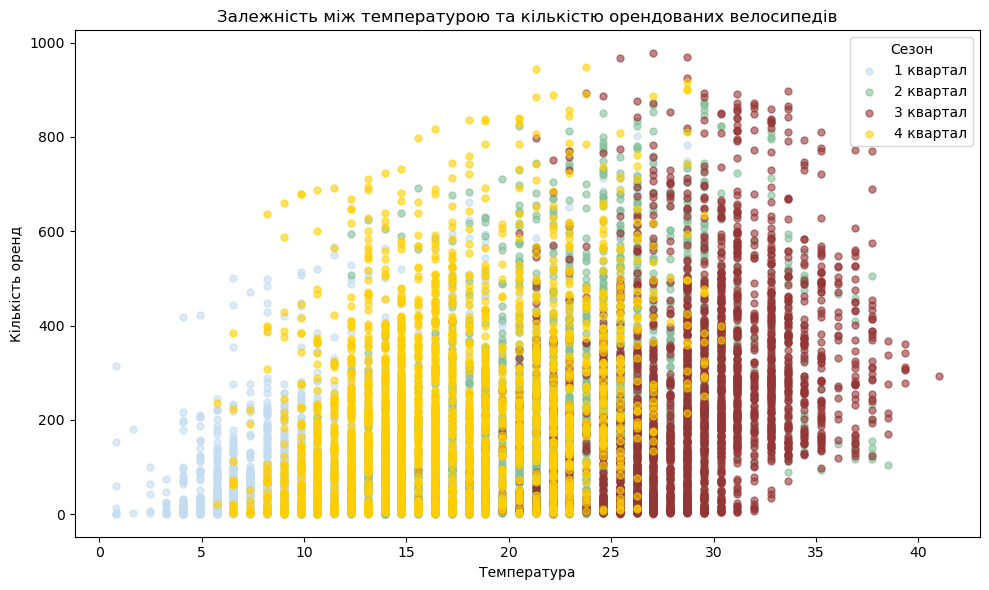

In [97]:
season_map = {1: '1 квартал', 2: '2 квартал', 3: '3 квартал', 4: '4 квартал'}
season_named = df['season'].map(season_map)


plt.figure(figsize=(10, 6))
for season, color in zip(season_map.values(), ['#C3DCF0', '#84BF99', '#943636', '#ffcf00']):
    subset = df[season_named == season]
    plt.scatter(subset['temp'], subset['count'], label=season, alpha=0.6, color=color, s=25)

plt.title('Залежність між температурою та кількістю орендованих велосипедів')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.legend(title='Сезон')

plt.tight_layout()

**Висновки:**

На діаграмі розсіювання видно чіткий та сильний позитивний зв'язок: зі зростанням температури зростає і загальна кількість оренди велосипедів. 
Зв'язок не є ідеально лінійним:
- низькі температури (до 10 градусів): кількість оренди низька та дуже стабільна (майже завжди нижче 300), незалежно від невеликих коливань температури,
- високі температури (близько 35 градусів): може спостерігатися незначне падіння попиту, бо надмірна спека може відлякувати користувачів.

Цей графік підтверджує висновки аналізу сезонності (стовпчикова діаграма з завдання 2):
- 1 квартал (*січень*, *лютий*, *березень*) - точки зосереджені в області низьких температур (від 0 до 15), при цих температурах попит доволі низький,
- 2 (*квітень*, *травень*, *червень*) та 4 (*жовтень*, *листопад*, *грудень*) квартали - чим вищі температури, тим вище попит і там він залишається стабільно високим,
- 3 квартал (*липень*, *серпень*, *вересень*) - точки домінують у діапазоні високих температур (вище 20 градусів), вони показують найвищий попит (багато точок вище 600-800) при найвищих температурах, що свідчить про піковий сезон.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

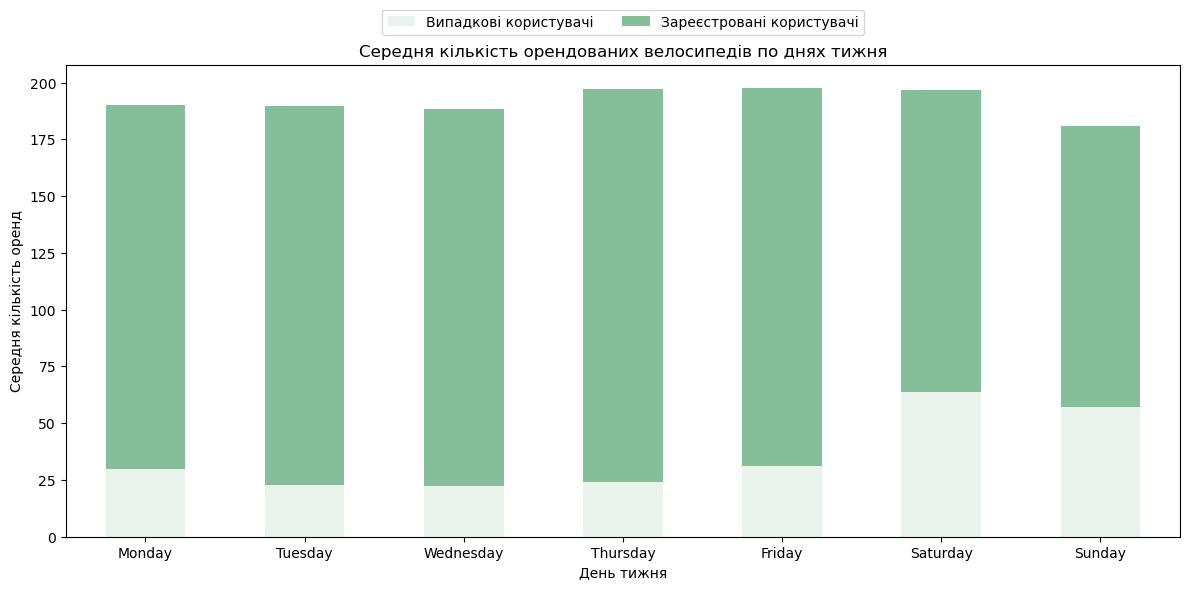

In [64]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = df.groupby('weekday')[['casual','registered']].mean()
weekday_avg = weekday_avg.reindex(ordered_days)

ax = weekday_avg.plot.bar(
    stacked=True, 
    figsize=(12,6),             
    color=['#E9F2EB','#84BF99'])

plt.title('Середня кількість орендованих велосипедів по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Середня кількість оренд')
plt.xticks(rotation=0)
plt.legend(['Випадкові користувачі','Зареєстровані користувачі'],
           loc='lower center',
           bbox_to_anchor=(0.5, 1.05),
           ncol=2
          )

plt.tight_layout() 
plt.show()

**Висновки:**

1. Зареєстровані користувачі орендують велосипеди найбільше протягом будніх днів. Найвищі середні показники оренди припадають на четвер та п'ятницю, де середні значення є найвищими.
На вихідних середня кількість оренд від зареєстрованих користувачів знижується.

2. Різниця в поведінці зареєстрованих та випадкових користувачів протягом тижня відображає їхні основні мотиви використання велосипедів:
- Зареєстровані користувачі використовують орендовані велосипеди як основний вид транспорту для поїздок на роботу чи навчання. Вони обирають абонементи чи реєстрацію, щоб заощадити час і кошти на регулярних поїздках. У вихідні дні потреба у комутингу зникає, і вони використовують велосипеди рідше.
- Випадкові користувачі використовують велосипеди для дозвілля, відпочинку та розваг, загалом для нерегулярних поїздок.

Таким чином, зареєстровані користувачі забезпечують базовий щоденний попит (комутинг), а випадкові користувачі - додатковий попит на вихідних (дозвілля).